In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Dataset Paths
DATASET_DIR = "C:\\Users\\Administrator\\OneDrive - Amrita vishwa vidyapeetham\\SEM6_CSE\\NNDL_DRUG\\train"  # Update with the correct path
IMG_SIZE = 64  # Resize images to 64x64

def load_data(dataset_dir, img_size):
    images, labels = [], []
    for img_name in os.listdir(dataset_dir):
        img_path = os.path.join(dataset_dir, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))  # Resize to uniform size
            img = img / 255.0  # Normalize pixel values
            
            # Label extraction from filename
            label = 1 if "dog" in img_name else 0
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_data(DATASET_DIR, IMG_SIZE)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Flatten images for MLP input
X_train = X_train.reshape(X_train.shape[0], -1)  
X_val = X_val.reshape(X_val.shape[0], -1)
# Print dataset size
print(f"Training samples: {X_train.shape[0]}, Validation samples: {X_val.shape[0]}")


Training samples: 20000, Validation samples: 5000


In [2]:
# Define MLP Model
model = Sequential([
    Dense(512, activation='relu', input_shape=(IMG_SIZE * IMG_SIZE * 3,)),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification: Cat (0) vs Dog (1)
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=32)


C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.5322 - loss: 1.0178 - val_accuracy: 0.6156 - val_loss: 0.6524
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.5973 - loss: 0.6705 - val_accuracy: 0.5396 - val_loss: 0.7016
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 57ms/step - accuracy: 0.5973 - loss: 0.6629 - val_accuracy: 0.5980 - val_loss: 0.6709
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.6041 - loss: 0.6635 - val_accuracy: 0.6206 - val_loss: 0.6473
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.6060 - loss: 0.6560 - val_accuracy: 0.5952 - val_loss: 0.6570
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.6196 - loss: 0.6485 - val_accuracy: 0.6050 - val_loss: 0.6583
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.6135 - loss: 0.6548 - val_accuracy: 0.5968 - val_loss: 0.6703
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.6222 - loss: 0.6471 - 

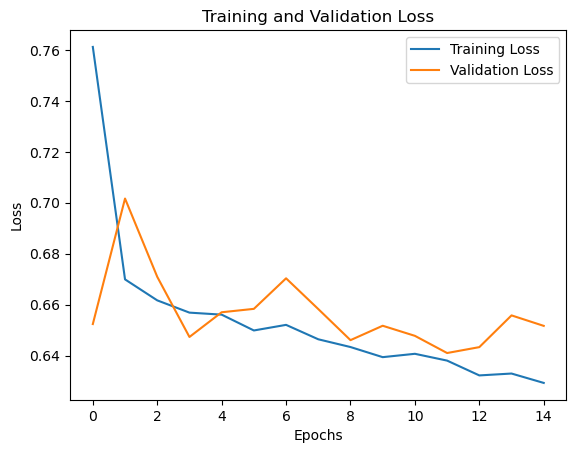

In [3]:
# Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


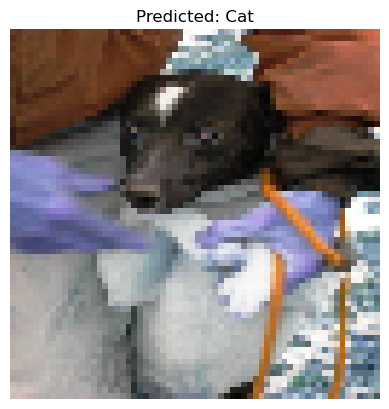

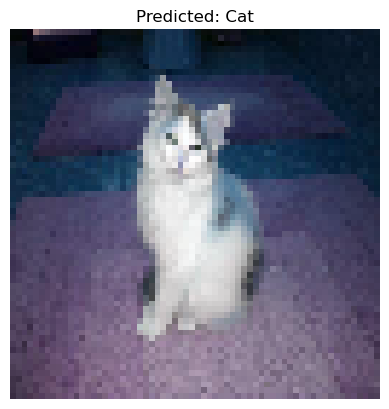

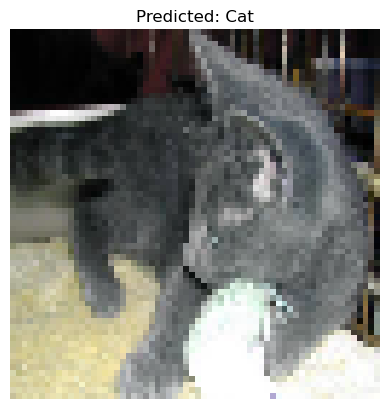

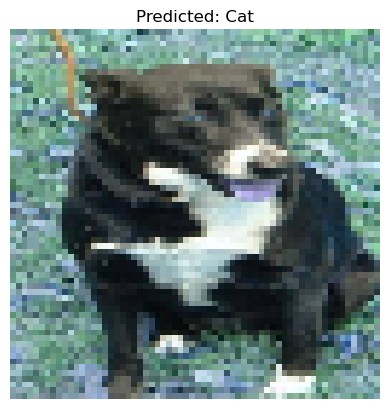

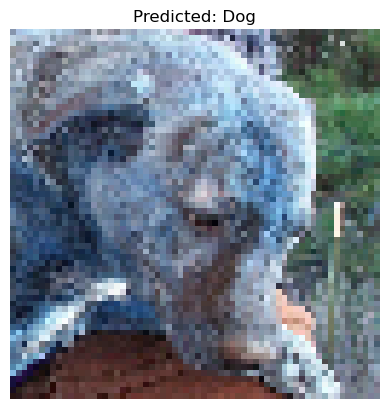

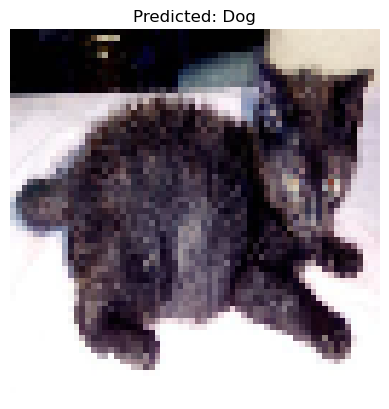

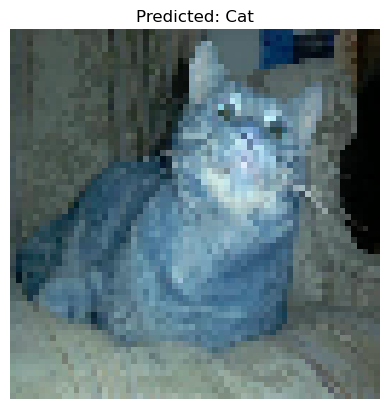

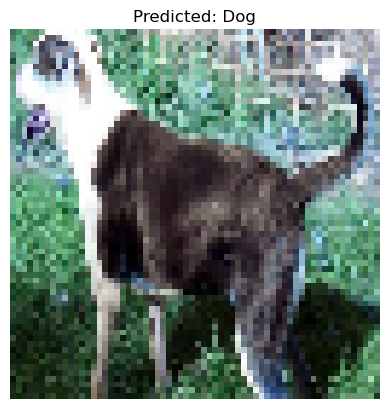

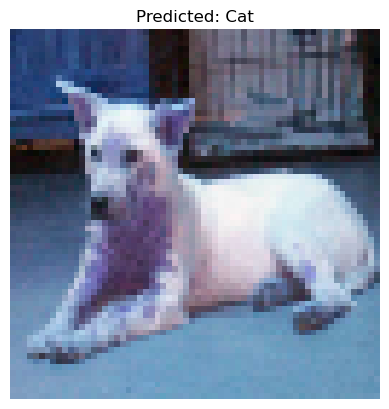

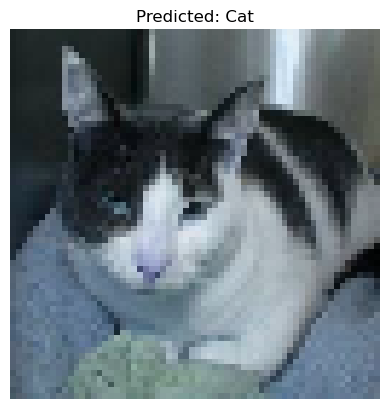

In [4]:
TEST_DIR = "C:\\Users\\Administrator\\OneDrive - Amrita vishwa vidyapeetham\\SEM6_CSE\\NNDL_DRUG\\test"  # Update with the correct path

def load_test_data(test_dir, img_size):
    test_images, test_names = [], []
    for img_name in os.listdir(test_dir):
        img_path = os.path.join(test_dir, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            img = img / 255.0
            test_images.append(img)
            test_names.append(img_name)

    return np.array(test_images), test_names

# Load test images
X_test, test_names = load_test_data(TEST_DIR, IMG_SIZE)

# Flatten test images
X_test = X_test.reshape(X_test.shape[0], -1)

# Predict on test images
predictions = model.predict(X_test)
predicted_classes = np.where(predictions > 0.5, 1, 0)

# Display Predictions for First 10 Images
for i in range(10):
    plt.imshow(X_test[i].reshape(IMG_SIZE, IMG_SIZE, 3))
    plt.title(f"Predicted: {'Dog' if predicted_classes[i] == 1 else 'Cat'}")
    plt.axis('off')
    plt.show()
